<a href="https://colab.research.google.com/github/slowvak/AI-Deep-Learning-Lab/blob/master/ImageProcessingAndDICOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** Tutorial on Image Processing in Python
(C) Copyright Bradley Erickson 2023


Image processing is a very large topic and we clearly cannot cover everything, but this does show some of hte common function required in medical image processing.


In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import scipy.ndimage as ndimage

from PIL import Image

--2023-01-10 23:33:20--  https://www.dropbox.com/s/56c8b451n3lcdun/T2_Ax_Brain.jpg
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/56c8b451n3lcdun/T2_Ax_Brain.jpg [following]
--2023-01-10 23:33:20--  https://www.dropbox.com/s/raw/56c8b451n3lcdun/T2_Ax_Brain.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd450294c27ef9e2eef06b57dfa.dl.dropboxusercontent.com/cd/0/inline/B0X8GyinVb_ecPdoIB-JUc-jKtVGp1ramyCYjAdwOGudQu3j5OOauBK8lbB59TCXMsQfUlw88mpTmvPTkTP4pxOUDYfRnO9hV2QGxrYLy9pf8TmdV3HiNaVfhUypyGNj2SH1U6roAWRbd08--Yxs4e-ygNq5moFPkKIktKf1aX7cPA/file# [following]
--2023-01-10 23:33:21--  https://ucd450294c27ef9e2eef06b57dfa.dl.dropboxusercontent.com/cd/0/inline/B0X8GyinVb_ecPdoIB-JUc-jKtVGp1ramyCYjAdwOGudQu3j5OOauBK8lbB59TCXMsQf

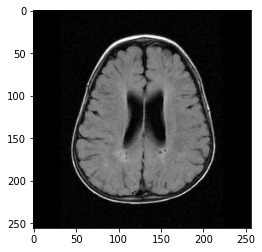

In [2]:
# get a single 2D image
import gdown

#!gdown https://drive.google.com/file/d/14C2DCQvw2gmw86S6hquvJKelGv55aLGG -O ./T2_Ax_Brain.jpg

!wget --no-check-cert https://www.dropbox.com/s/56c8b451n3lcdun/T2_Ax_Brain.jpg
#gdown.download(
#    "https://www.dropbox.com/s/56c8b451n3lcdun/T2_Ax_Brain.jpg?dl=0",
#    "T2_Ax_Brain.jpg",
#    quiet=False)

# We will use both the Pillow library and the imread function in matplotlib
brain_gray = Image.open("./T2_Ax_Brain.jpg").convert('L')
image = plt.imread("./T2_Ax_Brain.jpg")
imgplot = plt.imshow(image)


In [3]:
#Let's do some basics like rotating, filtering, changing grayscale, cropping and resizing

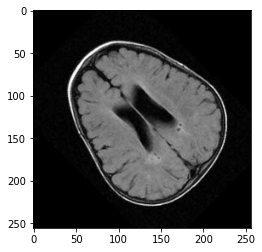

In [4]:
# rotate
rotated = ndimage.rotate(image, 45,reshape=False) #default is True, which enlarges matrix so corners fit
plt.imshow(rotated)


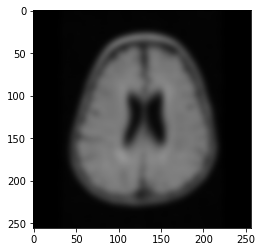

In [5]:
# filter
filtered = ndimage.gaussian_filter(image, 4)
plt.imshow(filtered)

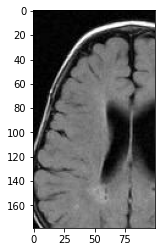

In [6]:
# crop
crop_img = image[20:199,50:150,:]    # we have a 2D image. Why is this a 3D array?
imgplot = plt.imshow(crop_img)

* Image Processing in Numpy
Numpy is a very powerful library for processing arrays, and since images are arrays, these can work together very well. THe main limit is that not all functions are sensible for images, and numpy doesn't always make it easy to show the arrays it produces as images.

In [7]:
# confirm the shape

print(f'Image shape: {image.shape}')
print(f'Grayscale Image shape: {brain_gray.size}')

Image shape: (256, 256, 3)
Grayscale Image shape: (256, 256)


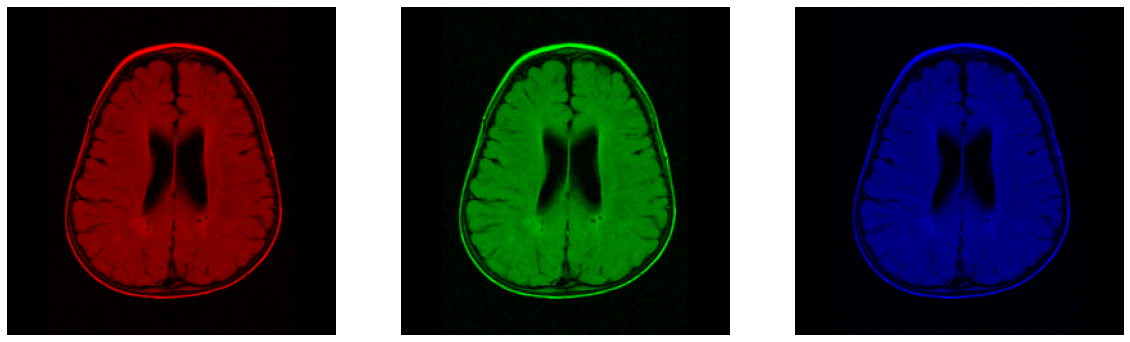

In [8]:
# Although our image is grayscale, if you look back at cell 3, which printed out the info about the image, it is RGB
# so lets split it into the 3 channels and confirm

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,8))
 
for c, ax in zip(range(3), axs):
    rgb_img = np.zeros(image.shape, dtype="uint8")
    rgb_img[:,:,c] = image[:,:,c]
    ax.imshow(rgb_img)
    ax.set_axis_off()


In [9]:
# first we will convert image to numpy array
brain_np = np.asarray(brain_gray)
brain_np

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

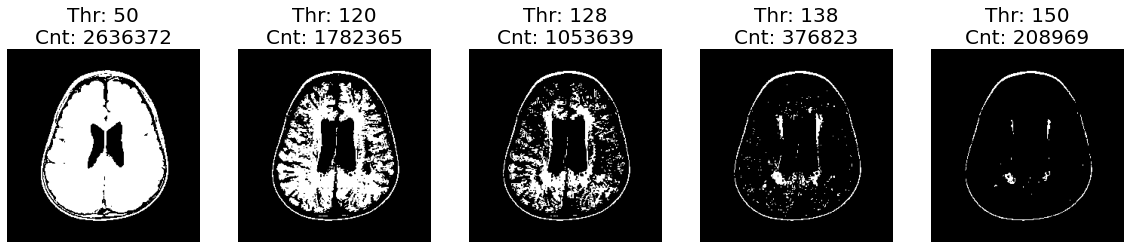

In [10]:
# now apply some thresholds

def simple_threshold(image, threshold=128):
    return ((image > threshold) * 255).astype("uint8")
 
thresholds = [50,120,128,138,150]
 
fig, axs = plt.subplots(nrows=1, ncols=len(thresholds), figsize=(20,5));
                        
for t, ax in zip(thresholds, axs):
    ax.imshow(simple_threshold(brain_np, t), cmap='gray');
    c = np.sum(brain_np[brain_np > t])
    ax.set_title(f"Thr: {t}\nCnt: {c}", fontsize=20);
    ax.set_axis_off();

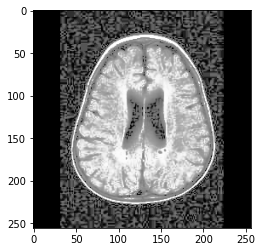

In [11]:
# histogram equalization

from skimage import exposure
import numpy as np


def histogram_equalize(img):
    img_cdf, bin_centers = exposure.cumulative_distribution(img)
    return np.interp(img, bin_centers, img_cdf)

heq = histogram_equalize(brain_np)

plt.imshow(heq, cmap='gray')

In [12]:
heq

array([[0.26554871, 0.26554871, 0.26554871, ..., 0.26554871, 0.26554871,
        0.26554871],
       [0.26554871, 0.26554871, 0.26554871, ..., 0.26554871, 0.26554871,
        0.26554871],
       [0.26554871, 0.26554871, 0.26554871, ..., 0.26554871, 0.26554871,
        0.26554871],
       ...,
       [0.26554871, 0.26554871, 0.26554871, ..., 0.26554871, 0.26554871,
        0.26554871],
       [0.26554871, 0.26554871, 0.26554871, ..., 0.26554871, 0.26554871,
        0.26554871],
       [0.26554871, 0.26554871, 0.26554871, ..., 0.26554871, 0.26554871,
        0.26554871]])

** Handling DICOM images
As noted before, DICOM has a TIFF_like form, in which tags about the image are at the start (called the 'header') and the pixels are at the end. There is a wonderful library for working with DICOM data called pyDicom which we will use. 

In [13]:
!pip install python-gdcm
!pip install pydicom




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:

import pydicom
#import gdcm
#import libjpeg


--2023-01-10 23:33:29--  https://www.dropbox.com/s/ab9mxd50abh9vaw/00000197.dcm
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/ab9mxd50abh9vaw/00000197.dcm [following]
--2023-01-10 23:33:30--  https://www.dropbox.com/s/raw/ab9mxd50abh9vaw/00000197.dcm
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc0b91cef0b10de22208304a061.dl.dropboxusercontent.com/cd/0/inline/B0Xupf6pGi7n5hOJi5_D474Stmu0UHc2EDfQ5s3vTwf4rD1UMHZZD9_HOrc4DpJUTErvF-aBO-uCGmt1ok2uZBl4dmlA59htnm_50e55Yjp1wBFIrD3UuB-TJiKiIC5x_qQ0ABwW6yyau_czCrGp34xf4mC5x1qvSalNCQdLSQMCcA/file# [following]
--2023-01-10 23:33:30--  https://ucc0b91cef0b10de22208304a061.dl.dropboxusercontent.com/cd/0/inline/B0Xupf6pGi7n5hOJi5_D474Stmu0UHc2EDfQ5s3vTwf4rD1UMHZZD9_HOrc4DpJUTErvF-aBO-uCG

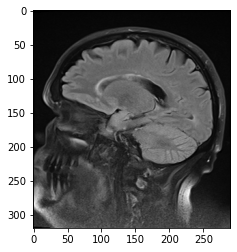

In [15]:
!wget --no-check-cert https://www.dropbox.com/s/ab9mxd50abh9vaw/00000197.dcm
ds = pydicom.dcmread("./00000197.dcm")
plt.imshow(ds.pixel_array, cmap=plt.cm.gray)

In [16]:
# now look at the ds (the instance of our pydicom DICOM data structure)
# this will print out ALL the dicom tags 

A bit about the above: there are several thinigs to note
Group, Element are shown in the parenthesis. Since it is always hexadecimal, they don't show the '0x' at the start.
Next they show a text description of the tag. This is not actually stored in the DICOM file, but instead is a part of the PyDICOM package.

Next is a 2 character code: DS, or US, or LO. This is a description of the Value Representation or VR. Here is a link to their description:
https://pydicom.github.io/pydicom/stable/guides/element_value_types.html
Because there have been issues with how numbers are stored in computers varying accross processor types (e.g. Intel and Motorola), most numbers are stored as strings, so you must convert these to actual integers or floats if you want to do math.


In [17]:
# while you can access tags using the (grp:elm) method, there are named attributes for most
patient_name = ds.PatientName
patient_name

'Pt-32'

In [18]:
pt_name = ds[0x0010, 0x0010]
pt_name

(0010, 0010) Patient's Name                      PN: 'Pt-32'

In [19]:
# if you want to work on the actual value, you must access the 'value' part of the object
pt_name = ds[0x0010, 0x0010].value
pt_name

'Pt-32'

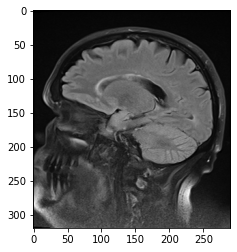

In [20]:
# For deep learning, we typically want to work with pixels. This is how:
pixels = ds.pixel_array
plt.imshow(pixels, cmap='gray')

Unfortunately, while DICOM can support 3D image data, almost noone does that. That means we may need to sort through all the images of an exam or series if we want to organize them such as to create a 3D volume. This means opening each image, finding its 'Image Position' tag, and then sorting all of them at the end. The filename has no meaning in DICOM.
For this reason, many people use special programs that will take DICOM exams and do this sorting and produce 1 file (typically) for each series. dcm2nii is 1 such program. 


A note about UIDs. DICOM uses several different Unique IDentifiers (UIDs). These are stored in the DICOM header. There is a StudyUID, SeriesUID, and InstanceUID, which should be globally unique for the study, series, and instance. Note that instance usually means an image, but DICOM can also store structure reports and other data, and thus 'Instance'. Note also that this image has none of these--these are considered Protected Health Information and are often removed during 'De-Identification'.

In [21]:
try:
    suid = ds.SeriesUID
except:
    print ('No UID')


No UID
